<a href="https://colab.research.google.com/github/pisceno/AI-Generative/blob/main/Aglomerativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clusterización Aglomerativa (Hierarchical Clustering) ###


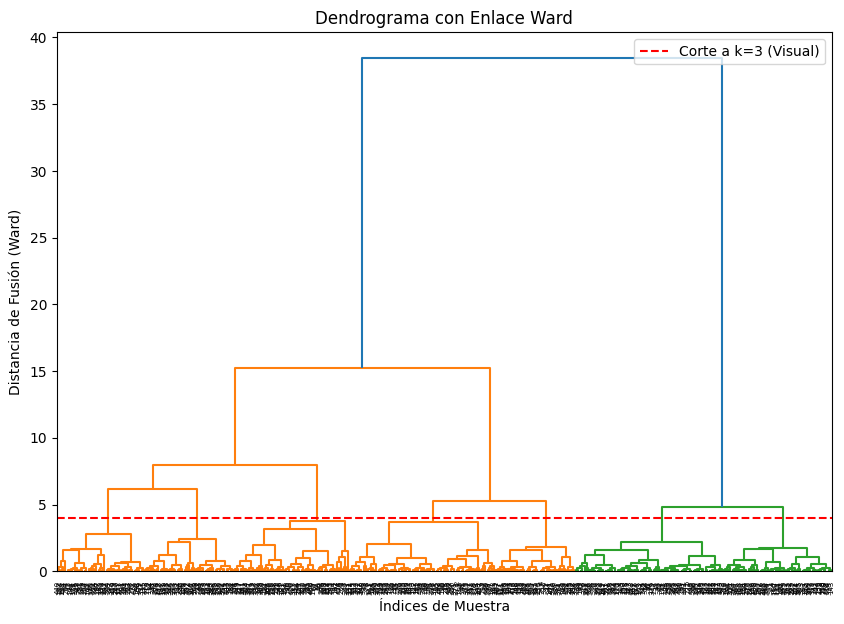

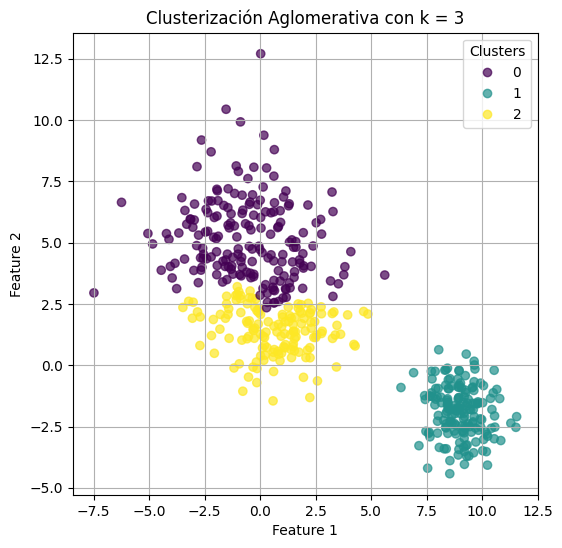

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

print("### Clusterización Aglomerativa (Hierarchical Clustering) ###")

# 1. Generación del Dataset Sintético (Replicando make_blobs)
# Se utilizan parámetros que simulan las 3 concentraciones esperadas.
# Se asume que el dataset original usó dos características.
X, y_true = make_blobs(n_samples=500, centers=[[-1, 5], [1, 2], [9, -2]],
                       cluster_std=[2.0, 1.5, 1.0], random_state=42)
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
feature_names = ["Feature 1", "Feature 2"]

# 2. Escalamiento (Normalización Estándar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Generación del Dendrograma
# Se utiliza el método 'ward' para el enlace, como se describe en el discurso técnico
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.axhline(y=4.0, color='r', linestyle='--', label='Corte a k=3 (Visual)') # Corte para obtener 3 clusters
plt.title('Dendrograma con Enlace Ward')
plt.xlabel('Índices de Muestra')
plt.ylabel('Distancia de Fusión (Ward)')
plt.legend()
plt.show()


# 4. Aplicación del modelo (k=3)
k_agglomerative = 3
# Se aplica el modelo con el k determinado por el dendrograma
model_agg = AgglomerativeClustering(n_clusters=k_agglomerative, linkage='ward')
labels_agg = model_agg.fit_predict(X_scaled)

# 5. Visualización
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis', alpha=0.7)
plt.title(f'Clusterización Aglomerativa con k = {k_agglomerative}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()